In [76]:
# imports

import lucem_illud #just in case, regularly update your lucem_illud with the following code: pip install git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile
import re
import gensim


#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

In [5]:
nlp = spacy.load("en_core_web_sm")
import nltk

In [6]:
file = open("C:\\Users\\Ethan\\Downloads\\Adoption_submissions\\Adoption_submissions.json", "r")

authors = []
author_flairs = []
titles = []
urls = []
post_texts = []
scores = []

for i in file:
    post = json.loads(i)
    post_text = post.get("selftext")
    if post_text != "" and post_text != "[deleted]":

        authors.append(post.get("author"))
        author_flairs.append(post.get("author_flair_text"))
        titles.append(post.get("title"))
        urls.append(post.get("url"))
        # remove the hyperlinks
        post_texts.append(re.sub(r"[\(]*http[s]*://[^\s\)]+[\)]*", "", post_text))
        scores.append(post.get("score"))


adopt_df = pandas.DataFrame({"author": authors,
                             "author flair": author_flairs,
                             "url": urls,
                             "title": titles,
                             "score": scores,
                             "text": list(post_texts)})

# print(len(authors))
# print(len(author_flairs))
# print(len(titles))
# print(len(urls))
# print(len(post_texts))
# print(len(scores))


important flags
* selftext
: not all have selftext

* author
* title
* author_flair_text
* score

In [7]:
adopt_df = pandas.DataFrame({"author": authors,
                             "author flair": author_flairs,
                             "url": urls,
                             "title": titles,
                             "score": scores,
                             "text": list(post_texts)})

In [8]:
adopt_df

,author,author flair,url,title,score,text
0,atoadmin,None,https://www.reddit.com/r/Adoption/comments/ei2...,"Reddit, help me find my bio mom!",1,So for years I have always wondered who is my ...
1,[deleted],None,https://www.reddit.com/r/Adoption/comments/eoe...,Adopting from the child welfare system US,4,my husband and I are thinking about adopting a...
2,hytch,None,http://www.reddit.com/r/Adoption/comments/feud...,Getting ready to adopt for the first time... A...,1,"In our province (we're in Canada), adoption is..."
3,sketchy_coffee_cup,None,http://www.reddit.com/r/Adoption/comments/ff1w...,Hey /r/ adoption... I was wondering if you cou...,5,I'll keep it short for now... I started dating...
4,[deleted],None,http://www.reddit.com/r/Adoption/comments/fgii...,wanting to find birth parents,1,"Ok, so this kinda ties in with my note on name..."
...,...,...,...,...,...,...
15187,Bigboss768,None,https://www.reddit.com/r/Adoption/comments/zzj...,The Unpleasant Side of Adoption,42,I am 22 years old and have never my biological...
15188,mamalo31,None,https://www.reddit.com/r/Adoption/comments/zzo...,What should we consider before adopting an old...,6,TL;DR What should we know before deciding to w...
15189,RestoSham09,None,https://www.reddit.com/r/Adoption/comments/zzz...,Searched my bio family on FB yesterday,29,My mother is in prison in the midwest along wi...
15190,ziig-piig,None,https://www.reddit.com/r/Adoption/comments/100...,experience w open adoption?,20,(deleted)


In [9]:
def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pandas.DataFrame(countsForFrame)

In [10]:
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

In [11]:
def clean_raw_text(raw_texts):
    clean_texts = []
    for text in raw_texts:
        try:
            text = text.decode("utf-8")
            clean_text = text.replace(" \'m", "'m").replace(" \'ll", "'ll").replace(" \'re", "'re").replace(" \'s", "'s").replace(" \'re", "'re").replace(" n\'t", "n't").replace(" \'ve", "'ve").replace(" /'d", "'d")
            clean_texts.append(clean_text)
        except AttributeError:
            print("ERROR CLEANING")
            print(text)
            continue
        except UnicodeDecodeError:
            print("Unicode Error, Skip")
            continue
    return clean_texts

In [12]:
adopt_df.loc[0, "text"]

'So for years I have always wondered who is my bio mom. Now that I am about to get married, I want to tell her she did the right thing.\n\nHer name back in 1989 was Angela Reyes. She was in the Indiana area that summer. She would have been 19 years of age, making her approx 40 now. I have been lead to believe she might of had family near Delaware County, Indiana.\n\nHelp me reddit!'

In [37]:
five_hundred_posts = adopt_df.loc[:500,"text"].str.cat()

In [14]:
adopt_tokens = word_tokenize(five_hundred_posts)

In [15]:
adopt_Text = nltk.Text(adopt_tokens)

In [16]:

adopt_index = nltk.text.ConcordanceIndex(adopt_Text)
adopt_index.print_concordance('adopt')

Displaying 25 of 139 matches:
le background I 've always wanted to adopt before I even thought about having m
 stories are welcome We 're about to adopt a three year old girl We are struggl
rward to adoption and really want to adopt a toddler boy I want to get things s
ion agency or should I try to foster adopt I live in California I have 7 brothe
iving in Clermont Florida wanting to adopt a twenty one year old male to female
ere is that I would really prefer to adopt a girl Some things that might be use
me deep rooted cause of my desire to adopt a girl as opposed to a boy I current
d it 's only reinforced my desire to adopt a girl While my closest friends are 
eminine tendencies at all If I could adopt two children somehow however I would
children somehow however I would n't adopt two girls I would adopt a boy and a 
 I would n't adopt two girls I would adopt a boy and a girl I 'm not opposed to
 understand a single male wanting to adopt a female child raises a lot of eyebr
friend and

In [17]:
adopt_short_df = adopt_df[:500].copy()
adopt_short_df["tokenized text"] = adopt_short_df.loc[:,'text'].apply(lambda x: word_tokenize(x))
adopt_short_df['word_counts'] = adopt_short_df.loc[:,'tokenized text'].apply(lambda x: len(x))
adopt_short_df

,author,author flair,url,title,score,text,tokenized text,word_counts
0,atoadmin,None,https://www.reddit.com/r/Adoption/comments/ei2...,"Reddit, help me find my bio mom!",1,So for years I have always wondered who is my ...,"[So, for, years, I, have, always, wondered, wh...",77
1,[deleted],None,https://www.reddit.com/r/Adoption/comments/eoe...,Adopting from the child welfare system US,4,my husband and I are thinking about adopting a...,"[my, husband, and, I, are, thinking, about, ad...",28
2,hytch,None,http://www.reddit.com/r/Adoption/comments/feud...,Getting ready to adopt for the first time... A...,1,"In our province (we're in Canada), adoption is...","[In, our, province, we, 're, in, Canada, adopt...",101
3,sketchy_coffee_cup,None,http://www.reddit.com/r/Adoption/comments/ff1w...,Hey /r/ adoption... I was wondering if you cou...,5,I'll keep it short for now... I started dating...,"[I, 'll, keep, it, short, for, now, I, started...",269
4,[deleted],None,http://www.reddit.com/r/Adoption/comments/fgii...,wanting to find birth parents,1,"Ok, so this kinda ties in with my note on name...","[Ok, so, this, kinda, ties, in, with, my, note...",195
...,...,...,...,...,...,...,...,...
495,[deleted],None,http://www.reddit.com/r/Adoption/comments/1dv9...,Finally wrote the letter to my birth parents a...,0,I still haven't made official contact so this...,"[I, still, have, n't, made, official, contact,...",86
496,Mfarraher,None,http://www.reddit.com/r/Adoption/comments/1dux...,Anyone here adopted into a family with biologi...,9,Did you struggle with the fact that you were n...,"[Did, you, struggle, with, the, fact, that, yo...",75
497,TheLastRacounteur,None,http://www.reddit.com/r/Adoption/comments/1duh...,"I was adopted through the Cherokee nation, can...",4,I was adopted through the Cherokee Nation as a...,"[I, was, adopted, through, the, Cherokee, Nati...",45
498,deeznuts69,None,http://www.reddit.com/r/Adoption/comments/1dxg...,Looking for advice on how to help our friends ...,0,Our good friends are trying to adopt a child a...,"[Our, good, friends, are, trying, to, adopt, a...",63


Filtering

## <font color="red">*Exercise 2*</font>

<font color="red">Construct cells immediately below this that filter, stem and lemmatize the tokens in your corpus, and then creates plots (with titles and labels) that map the word frequency distribution, word probability distribution, and at least two conditional probability distributions that help us better understand the social and cultural game underlying the production of your corpus. Create a wordl of words (or normalized words) and add a few vague comments about what mysteries are revealed through it.</font>

In [18]:
# most frequent words in the posts
countsDict = {}
for word in adopt_short_df['tokenized text'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[:50]

[('I', 4202),
 ('to', 3014),
 ('and', 2639),
 ('the', 2396),
 ('a', 1999),
 ('my', 1576),
 ('of', 1402),
 ('that', 1176),
 ('in', 1132),
 ('was', 1117),
 ('have', 1110),
 ('for', 1046),
 ('is', 982),
 ('her', 876),
 ('it', 857),
 ('with', 784),
 ('me', 776),
 ("n't", 764),
 ('be', 717),
 ('this', 685),
 ('but', 654),
 ('she', 635),
 ('do', 620),
 ("'s", 590),
 ('we', 587),
 ('you', 560),
 ('are', 527),
 ('not', 507),
 ('about', 503),
 ('adoption', 499),
 ('on', 480),
 ('would', 469),
 ('or', 464),
 ('know', 437),
 ('as', 421),
 ("'m", 411),
 ('parents', 385),
 ('they', 385),
 ('birth', 383),
 ('from', 379),
 ('he', 371),
 ('had', 366),
 ('so', 365),
 ('if', 362),
 ('out', 353),
 ('all', 349),
 ('up', 347),
 ('at', 345),
 ('My', 341),
 ('like', 340)]

In [19]:
#The stop list is then all words that occur before the first noun
stop_words_freq = []
for word, count in word_counts:
    if word == 'adoption':
        break
    else:
        stop_words_freq.append(word)
stop_words_freq

['I',
 'to',
 'and',
 'the',
 'a',
 'my',
 'of',
 'that',
 'in',
 'was',
 'have',
 'for',
 'is',
 'her',
 'it',
 'with',
 'me',
 "n't",
 'be',
 'this',
 'but',
 'she',
 'do',
 "'s",
 'we',
 'you',
 'are',
 'not',
 'about']

In [20]:
def normalizeTokens(word_list, extra_stop=[]):
    #We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list])

    doc = nlp(word_list.lower())

    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))

    return normalized


In [21]:
# add normalized tokens
adopt_short_df['normalized tokens'] = adopt_short_df['tokenized text'].apply(lambda x: normalizeTokens(x))
# add their count as well
adopt_short_df['normalized tokens count'] = adopt_short_df['normalized tokens'].apply(lambda x: len(x))

In [22]:
adoptcfdist = nltk.ConditionalFreqDist(((len(w), w) for w in adopt_short_df['normalized tokens'].sum()))

#print the number of words
print(adoptcfdist.N())

35437


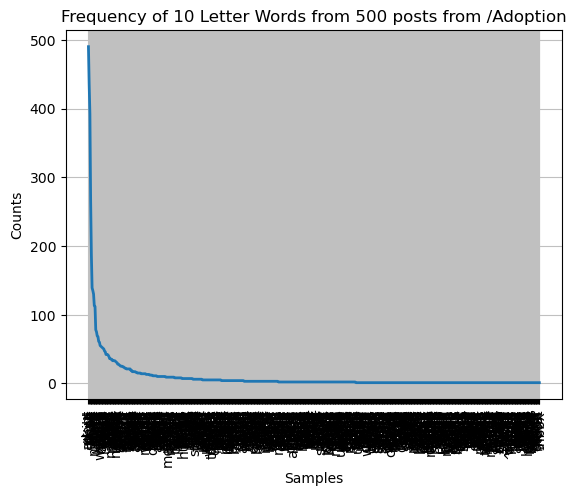

<Axes: title={'center': 'Frequency of 10 Letter Words from 500 posts from /Adoption'}, xlabel='Samples', ylabel='Counts'>

In [23]:
plt.xlabel("10 Letter Words")
plt.title("Frequency of 10 Letter Words from 500 posts from /Adoption")
adoptcfdist[5].plot()

In [24]:
adoptcpdist = nltk.ConditionalProbDist(adoptcfdist, nltk.ELEProbDist)

#print the most common 2 letter word
print(adoptcpdist[5].max())

#And its probability
print(adoptcpdist[5].prob(adoptcpdist[5].max()))

adopt
0.07685678470698841


The most common 5 letter word among these 500 Reddit posts is adopt. This word makes a lot of sense to be the most common word because the subreddit is focused around adoption. Additionally, after stripping, normalizing, and lemitizing these text data, words like adopts and adopted turn into adopt.

In [25]:
adoptcpdist = nltk.ConditionalProbDist(adoptcfdist, nltk.ELEProbDist)

#print the most common 2 letter word
print(adoptcpdist[6].max())

#And its probability
print(adoptcpdist[6].prob(adoptcpdist[6].max()))

parent
0.08050348637145703


In [26]:
def spacy_pos(word_list):
    tags = []
    doc = nlp(word_list.lower())
    for w in doc:
        tags.append((w.text, w.tag_))
    return tags

In [27]:
adopt_short_df['normalized tokensPOS'] = [spacy_pos(t) for t in adopt_short_df['text']]

In [28]:
adopt_short_df

,author,author flair,url,title,score,text,tokenized text,word_counts,normalized tokens,normalized tokens count,normalized tokensPOS
0,atoadmin,None,https://www.reddit.com/r/Adoption/comments/ei2...,"Reddit, help me find my bio mom!",1,So for years I have always wondered who is my ...,"[So, for, years, I, have, always, wondered, wh...",77,"[year, wonder, bio, mom, marry, want, tell, ri...",27,"[(so, RB), (for, IN), (years, NNS), (i, PRP), ..."
1,[deleted],None,https://www.reddit.com/r/Adoption/comments/eoe...,Adopting from the child welfare system US,4,my husband and I are thinking about adopting a...,"[my, husband, and, I, are, thinking, about, ad...",28,"[husband, think, adopt, child, child, welfare,...",10,"[(my, PRP$), (husband, NN), (and, CC), (i, PRP..."
2,hytch,None,http://www.reddit.com/r/Adoption/comments/feud...,Getting ready to adopt for the first time... A...,1,"In our province (we're in Canada), adoption is...","[In, our, province, we, 're, in, Canada, adopt...",101,"[province, canada, adoption, handle, provincia...",33,"[(in, IN), (our, PRP$), (province, NN), ((, -L..."
3,sketchy_coffee_cup,None,http://www.reddit.com/r/Adoption/comments/ff1w...,Hey /r/ adoption... I was wondering if you cou...,5,I'll keep it short for now... I started dating...,"[I, 'll, keep, it, short, for, now, I, started...",269,"[short, start, date, woman, y, o, month, ago, ...",93,"[(i, PRP), ('ll, MD), (keep, VB), (it, PRP), (..."
4,[deleted],None,http://www.reddit.com/r/Adoption/comments/fgii...,wanting to find birth parents,1,"Ok, so this kinda ties in with my note on name...","[Ok, so, this, kinda, ties, in, with, my, note...",195,"[ok, kinda, tie, note, change, topic, link, ok...",63,"[(ok, UH), (,, ,), (so, RB), (this, DT), (kind..."
...,...,...,...,...,...,...,...,...,...,...,...
495,[deleted],None,http://www.reddit.com/r/Adoption/comments/1dv9...,Finally wrote the letter to my birth parents a...,0,I still haven't made official contact so this...,"[I, still, have, n't, made, official, contact,...",86,"[official, contact, mental, thing, want, thank...",26,"[( , _SP), (i, PRP), (still, RB), (have, VBP),..."
496,Mfarraher,None,http://www.reddit.com/r/Adoption/comments/1dux...,Anyone here adopted into a family with biologi...,9,Did you struggle with the fact that you were n...,"[Did, you, struggle, with, the, fact, that, yo...",75,"[struggle, fact, biologically, related, differ...",30,"[(did, VBD), (you, PRP), (struggle, VB), (with..."
497,TheLastRacounteur,None,http://www.reddit.com/r/Adoption/comments/1duh...,"I was adopted through the Cherokee nation, can...",4,I was adopted through the Cherokee Nation as a...,"[I, was, adopted, through, the, Cherokee, Nati...",45,"[adopt, cherokee, nation, infant, grow, abusiv...",18,"[(i, PRP), (was, VBD), (adopted, VBN), (throug..."
498,deeznuts69,None,http://www.reddit.com/r/Adoption/comments/1dxg...,Looking for advice on how to help our friends ...,0,Our good friends are trying to adopt a child a...,"[Our, good, friends, are, trying, to, adopt, a...",63,"[good, friend, try, adopt, child, have, diffic...",30,"[(our, PRP$), (good, JJ), (friends, NNS), (are..."


In [29]:
adoptcfdist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in adopt_short_df['normalized tokensPOS'].sum())

In [30]:
adoptcfdist_POStoWord["JJ"]

FreqDist({'biological': 194, 'adoptive': 151, 'other': 141, 'old': 115, 'sure': 112, 'first': 106, 'few': 105, 'little': 99, 'own': 98, 'last': 88, ...})

In [31]:
adoptcfdist_POStoWord['VB'].most_common(5)

[('be', 713), ('have', 362), ('know', 269), ('get', 186), ('do', 181)]

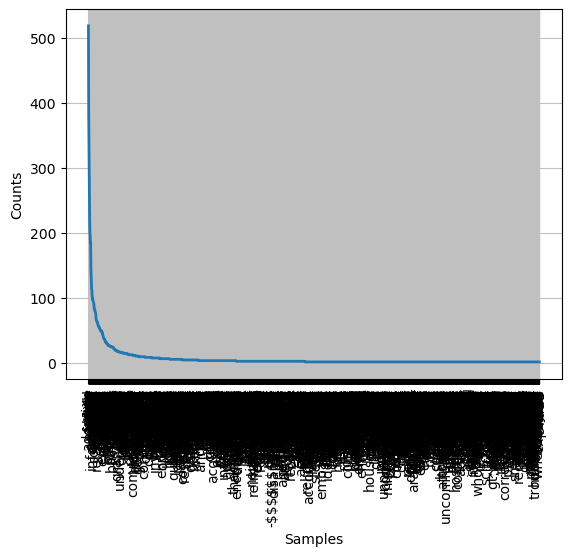

<Axes: xlabel='Samples', ylabel='Counts'>

In [32]:
adoptcfdist_POStoWord['NN'].plot()

In [33]:
adoptcpdist_POStoWord = nltk.ConditionalProbDist(adoptcfdist_POStoWord, nltk.ELEProbDist)

#print the most common nouns
print(adoptcpdist_POStoWord['NN'].max())

#And its probability
print(adoptcpdist_POStoWord['NN'].prob(adoptcpdist_POStoWord['NN'].max()))

adoption
0.03854302174317042


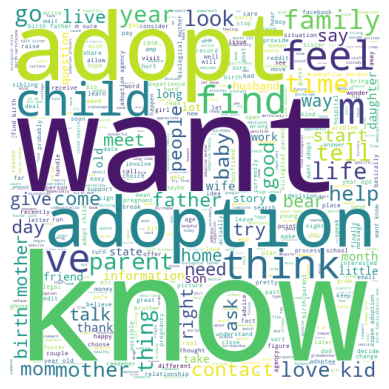

In [34]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(adopt_short_df['normalized tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("adopt_word_cloud.pdf", format = 'pdf')

## <font color="red">Exercise 3</font>

<font color="red">In the cells immediately following, perform POS tagging on a meaningful (but modest) subset of a corpus associated with your final project. Examine the list of words associated with at least three different parts of speech. Consider conditional associations (e.g., adjectives associated with nouns or adverbs with verbs of interest). What do these distributions suggest about your corpus?

In [68]:
def sent_tokenize(word_list):
    doc = nlp(word_list)
    sentences = [sent.text.strip() for sent in doc.sents]
    return sentences


def tag_sents_pos(sentences):
    """
    function which replicates NLTK pos tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)

    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for token in sent:
            pos_sent.append((token.text, token.tag_))
        pos_sents.append(pos_sent)

    return pos_sents

In [69]:
adopt_short_df["sentences"] = adopt_short_df['text'].apply(lambda x: [word_tokenize(s) for s in sent_tokenize(x)])

adopt_short_df['POS_sents'] = adopt_short_df['sentences'].apply(lambda x: tag_sents_pos(x))

c:\Users\Ethan\anaconda3\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [ ]:
countTarget = 'NN'
targetCounts = {}
for entry in adopt_short_df['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

In [ ]:
NTarget = 'JJ'
Word = 'computer'
NResults = set()
for entry in adopt_short_df['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

## <font color="red">*Exercise 4*</font>

<font color="red">Construct cells immediately below this that identify statistically significant bigrams, trigrams, quadgrams, higher-order *n*grams and skipgrams. Explore whether these collocations are idiomatic and so irreducible to the semantic sum of their component words. You can do this by examination of conditional frequencies (e.g., what else is 'united' besides the 'United States'). If these phrases are idiomatic, what do they suggest about the culture of the world producing them?

<font color="red">**Stretch**: In Manning and Schütze's textbook, there Section 5.3.2 explores how to use the *t*-test to find words whose co-occurance patterns best distinguish two words. Implement that and use it to explore phrases in your corpus. For instance, you could tell what words come after "America" much more often than after "Iraq"?</font>

In [93]:
def bigramScoring(count, wordsTuple, total):
    return count

birgramScores = []
def bigramPrinting(count, wordsTuple, total):
    global birgramScores
    birgramScores.append("The first word is:  {}, The second word is: {}".format(*wordsTuple))
    #Returns None so all the tuples are considered to have the same rank


In [95]:
adoptBigrams = nltk.collocations.BigramCollocationFinder.from_words(adopt_short_df['normalized tokens'].sum())
print("There are {} bigrams in the finder".format(adoptBigrams.N))

There are 35437 bigrams in the finder


In [98]:
print(adoptBigrams.nbest(bigramScoring, 20))
adoptBigrams.nbest(bigramPrinting, 20)
print('\n'.join(birgramScores[:20]))

[('birth', 'mother'), ('adoptive', 'parent'), ('year', 'old'), ('birth', 'parent'), ('feel', 'like'), ('open', 'adoption'), ('adopt', 'child'), ('year', 'ago'), ('biological', 'mother'), ('m', 'sure'), ('birth', 'father'), ('adoption', 'agency'), ('biological', 'parent'), ('want', 'know'), ('want', 'adopt'), ('find', 'birth'), ('biological', 'father'), ('know', 'm'), ('know', 'adopt'), ('adoptive', 'mother')]
The first word is:  392, The second word is: 354
The first word is:  151, The second word is: 444
The first word is:  357, The second word is: 198
The first word is:  392, The second word is: 444
The first word is:  284, The second word is: 358
The first word is:  88, The second word is: 552
The first word is:  490, The second word is: 435
The first word is:  357, The second word is: 87
The first word is:  195, The second word is: 354
The first word is:  446, The second word is: 113
The first word is:  392, The second word is: 215
The first word is:  552, The second word is: 110
T

In [99]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
adoptBigrams.score_ngrams(bigram_measures.likelihood_ratio)[:40]
# other options include student_t, chi_sq, likelihood_ratio, pmi


[(('birth', 'mother'), 672.0595550973226),
 (('adoptive', 'parent'), 489.99925150578565),
 (('year', 'old'), 437.1145907091393),
 (('year', 'ago'), 349.049103389096),
 (('open', 'adoption'), 310.6096424295027),
 (('feel', 'like'), 286.76475445025466),
 (('m', 'sure'), 256.17323349328683),
 (('biological', 'mother'), 241.13486191741623),
 (('birth', 'parent'), 234.17063934321916),
 (('adoption', 'agency'), 201.07986628463328),
 (('high', 'school'), 195.07249026828828),
 (('birth', 'certificate'), 190.02348631946063),
 (('medical', 'history'), 181.23108873194838),
 (('birth', 'father'), 180.4568619624532),
 (('closed', 'adoption'), 167.49355831549497),
 (('non', 'identify'), 164.14119249499294),
 (('change', 'mind'), 151.71500953406849),
 (('half', 'brother'), 149.46124036420494),
 (('greatly', 'appreciate'), 146.21913359219042),
 (('biological', 'parent'), 141.41145459519618),
 (('adopt', 'child'), 132.66097477556954),
 (('biological', 'father'), 130.9831280229166),
 (('identify', 'info

In [77]:
bigram = gensim.models.Phrases(adopt_short_df['normalized tokens'])

In [78]:
texts = [bigram[line] for line in adopt_short_df['normalized tokens']]

## <font color="red">*Exercise 5*</font>

<font color="red">In the cells immediately following, perform NER on a (modest) subset of your corpus of interest. List all of the different kinds of entities tagged? What does their distribution suggest about the focus of your corpus? For a subset of your corpus, tally at least one type of named entity and calculate the Precision, Recall and F-score for the NER classification just performed.

In [107]:
def tag_sents_ner(sentences):
    """
    function which replicates NLTK ner tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)

    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for ent in sent.ents:
            pos_sent.append((ent.text, ent.label_))
        pos_sents.append(pos_sent)

    return pos_sents

In [105]:
adopt_short_df

,author,author flair,url,title,score,text,tokenized text,word_counts,normalized tokens,normalized tokens count,normalized tokensPOS,sentences,POS_sents
0,atoadmin,None,https://www.reddit.com/r/Adoption/comments/ei2...,"Reddit, help me find my bio mom!",1,So for years I have always wondered who is my ...,"[So, for, years, I, have, always, wondered, wh...",77,"[year, wonder, bio, mom, marry, want, tell, ri...",27,"[(so, RB), (for, IN), (years, NNS), (i, PRP), ...","[[So, for, years, I, have, always, wondered, w...","[[(So, RB), (for, IN), (years, NNS), (I, PRP),..."
1,[deleted],None,https://www.reddit.com/r/Adoption/comments/eoe...,Adopting from the child welfare system US,4,my husband and I are thinking about adopting a...,"[my, husband, and, I, are, thinking, about, ad...",28,"[husband, think, adopt, child, child, welfare,...",10,"[(my, PRP$), (husband, NN), (and, CC), (i, PRP...","[[my, husband, and, I, are, thinking, about, a...","[[(my, PRP$), (husband, NN), (and, CC), (I, PR..."
2,hytch,None,http://www.reddit.com/r/Adoption/comments/feud...,Getting ready to adopt for the first time... A...,1,"In our province (we're in Canada), adoption is...","[In, our, province, we, 're, in, Canada, adopt...",101,"[province, canada, adoption, handle, provincia...",33,"[(in, IN), (our, PRP$), (province, NN), ((, -L...","[[In, our, province, we, 're, in, Canada, adop...","[[(In, IN), (our, PRP$), (province, NN), (we, ..."
3,sketchy_coffee_cup,None,http://www.reddit.com/r/Adoption/comments/ff1w...,Hey /r/ adoption... I was wondering if you cou...,5,I'll keep it short for now... I started dating...,"[I, 'll, keep, it, short, for, now, I, started...",269,"[short, start, date, woman, y, o, month, ago, ...",93,"[(i, PRP), ('ll, MD), (keep, VB), (it, PRP), (...","[[I, 'll, keep, it, short, for, now], [I, star...","[[(I, PRP), ('ll, MD), (keep, VB), (it, PRP), ..."
4,[deleted],None,http://www.reddit.com/r/Adoption/comments/fgii...,wanting to find birth parents,1,"Ok, so this kinda ties in with my note on name...","[Ok, so, this, kinda, ties, in, with, my, note...",195,"[ok, kinda, tie, note, change, topic, link, ok...",63,"[(ok, UH), (,, ,), (so, RB), (this, DT), (kind...","[[Ok, so, this, kinda, ties, in, with, my, not...","[[(Ok, UH), (so, RB), (this, DT), (kinda, JJ),..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,[deleted],None,http://www.reddit.com/r/Adoption/comments/1dv9...,Finally wrote the letter to my birth parents a...,0,I still haven't made official contact so this...,"[I, still, have, n't, made, official, contact,...",86,"[official, contact, mental, thing, want, thank...",26,"[( , _SP), (i, PRP), (still, RB), (have, VBP),...","[[], [I, still, have, n't, made, official, con...","[[( , _SP)], [(I, PRP), (still, RB), (have, VB..."
496,Mfarraher,None,http://www.reddit.com/r/Adoption/comments/1dux...,Anyone here adopted into a family with biologi...,9,Did you struggle with the fact that you were n...,"[Did, you, struggle, with, the, fact, that, yo...",75,"[struggle, fact, biologically, related, differ...",30,"[(did, VBD), (you, PRP), (struggle, VB), (with...","[[Did, you, struggle, with, the, fact, that, y...","[[(Did, VBD), (you, PRP), (struggle, VB), (wit..."
497,TheLastRacounteur,None,http://www.reddit.com/r/Adoption/comments/1duh...,"I was adopted through the Cherokee nation, can...",4,I was adopted through the Cherokee Nation as a...,"[I, was, adopted, through, the, Cherokee, Nati...",45,"[adopt, cherokee, nation, infant, grow, abusiv...",18,"[(i, PRP), (was, VBD), (adopted, VBN), (throug...","[[I, was, adopted, through, the, Cherokee, Nat...","[[(I, PRP), (was, VBD), (adopted, VBN), (throu..."
498,deeznuts69,None,http://www.reddit.com/r/Adoption/comments/1dxg...,Looking for advice on how to help our friends ...,0,Our good friends are trying to adopt a child a...,"[Our, good, friends, are, trying, to, adopt, a...",63,"[good, friend, try, adopt, child, have, diffic...",30,"[(our, PRP$), (good, JJ), (friends, NNS), (are

In [108]:
adopt_short_df['classified sents'] = adopt_short_df['sentences'].apply(lambda x: tag_sents_ner(x))

In [118]:
entityCounts = {}
for entry in adopt_short_df['classified sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if ent in entityCounts:
                entityCounts[ent] += 1
            else:
                entityCounts[ent] = 1
sortedEntities = sorted(entityCounts.items(), key = lambda x: x[1], reverse = True)
sortedEntities[:10]

[('first', 120),
 ('two', 70),
 ('one', 52),
 ('half', 33),
 ('2', 29),
 ('3', 27),
 ('years', 19),
 ('Reddit', 17),
 ('US', 16),
 ('second', 16)]

In [119]:
nonObjCounts = {}
for entry in adopt_short_df['classified sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind == 'ORG':
                continue
            elif ent in nonObjCounts:
                nonObjCounts[ent] += 1
            else:
                nonObjCounts[ent] = 1
sortedNonObj = sorted(nonObjCounts.items(), key = lambda x: x[1], reverse = True)
sortedNonObj[:10]

[('first', 120),
 ('two', 70),
 ('one', 52),
 ('half', 33),
 ('2', 29),
 ('3', 27),
 ('years', 19),
 ('Reddit', 17),
 ('US', 16),
 ('second', 16)]

In [121]:
OrgCounts = {}
for entry in adopt_short_df['classified sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind == 'ORG':
                print(ent)

ENTIRE
NY
American Citizens
Government
Post Adoption Disclosure Services
American Citizens
Government
Post Adoption Disclosure Services
Needless
Quick
Asperger
S. Florida
Catholic Charities
the Coast Guard
State
Needless
Information
BC
Kyle Macmanus
IE Things
Native American ancestry Those
IKAA
Agency
Coast Guard
the PA Department of Vital Records
DOVR
LA Getting
HER
IAMA
Potential Adoptive Couples
AMA
Roanoke VA
the Virginia Department of Social Services
Armenian Adoptions Hopscotch Adoptions
Complaint
Armenian Adoptions Hopscotch Adoptions
Hopscotch Adoptions
IRS
Hopscotch Adoptions Anyone
Complaint
Public Relations and Marketing
Washington State Couple Shepherds
Pediatric Hospital The Ministry of Social Affairs
Armenian Technology Group Armenian Chamber of Commerce Children
Armenia Fund
Armenian Tree Project
Moroccan Adoptions
Islam
Ghana Adoptions
Hopscotch Adoptions
AMA
ER
ER
ER
Random Acts of
ER
Birthfather
Reactive Attachment
RADdishes
RAD
RAD
WOW Props
Next
Drunken
Update First

In [129]:
adopt_short_df

,author,author flair,url,title,score,text,tokenized text,word_counts,normalized tokens,normalized tokens count,normalized tokensPOS,sentences,POS_sents,classified sents
0,atoadmin,None,https://www.reddit.com/r/Adoption/comments/ei2...,"Reddit, help me find my bio mom!",1,So for years I have always wondered who is my ...,"[So, for, years, I, have, always, wondered, wh...",77,"[year, wonder, bio, mom, marry, want, tell, ri...",27,"[(so, RB), (for, IN), (years, NNS), (i, PRP), ...","[[So, for, years, I, have, always, wondered, w...","[[(So, RB), (for, IN), (years, NNS), (I, PRP),...","[[(years, DATE), (1989, DATE)], [(Angela Reyes..."
1,[deleted],None,https://www.reddit.com/r/Adoption/comments/eoe...,Adopting from the child welfare system US,4,my husband and I are thinking about adopting a...,"[my, husband, and, I, are, thinking, about, ad...",28,"[husband, think, adopt, child, child, welfare,...",10,"[(my, PRP$), (husband, NN), (and, CC), (i, PRP...","[[my, husband, and, I, are, thinking, about, a...","[[(my, PRP$), (husband, NN), (and, CC), (I, PR...","[[(US, GPE)]]"
2,hytch,None,http://www.reddit.com/r/Adoption/comments/feud...,Getting ready to adopt for the first time... A...,1,"In our province (we're in Canada), adoption is...","[In, our, province, we, 're, in, Canada, adopt...",101,"[province, canada, adoption, handle, provincia...",33,"[(in, IN), (our, PRP$), (province, NN), ((, -L...","[[In, our, province, we, 're, in, Canada, adop...","[[(In, IN), (our, PRP$), (province, NN), (we, ...","[[(Canada, GPE), (2004, DATE), (first, ORDINAL..."
3,sketchy_coffee_cup,None,http://www.reddit.com/r/Adoption/comments/ff1w...,Hey /r/ adoption... I was wondering if you cou...,5,I'll keep it short for now... I started dating...,"[I, 'll, keep, it, short, for, now, I, started...",269,"[short, start, date, woman, y, o, month, ago, ...",93,"[(i, PRP), ('ll, MD), (keep, VB), (it, PRP), (...","[[I, 'll, keep, it, short, for, now], [I, star...","[[(I, PRP), ('ll, MD), (keep, VB), (it, PRP), ...","[[(20, CARDINAL), (just 3 months ago, DATE), (..."
4,[deleted],None,http://www.reddit.com/r/Adoption/comments/fgii...,wanting to find birth parents,1,"Ok, so this kinda ties in with my note on name...","[Ok, so, this, kinda, ties, in, with, my, note...",195,"[ok, kinda, tie, note, change, topic, link, ok...",63,"[(ok, UH), (,, ,), (so, RB), (this, DT), (kind...","[[Ok, so, this, kinda, ties, in, with, my, not...","[[(Ok, UH), (so, RB), (this, DT), (kinda, JJ),...","[[], [(one, CARDINAL)], [], [], []]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,[deleted],None,http://www.reddit.com/r/Adoption/comments/1dv9...,Finally wrote the letter to my birth parents a...,0,I still haven't made official contact so this...,"[I, still, have, n't, made, official, contact,...",86,"[official, contact, mental, thing, want, thank...",26,"[( , _SP), (i, PRP), (still, RB), (have, VBP),...","[[], [I, still, have, n't, made, official, con...","[[( , _SP)], [(I, PRP), (still, RB), (have, VB...","[[], [], []]"
496,Mfarraher,None,http://www.reddit.com/r/Adoption/comments/1dux...,Anyone here adopted into a family with biologi...,9,Did you struggle with the fact that you were n...,"[Did, you, struggle, with, the, fact, that, yo...",75,"[struggle, fact, biologically, related, differ...",30,"[(did, VBD), (you, PRP), (struggle, VB), (with...","[[Did, you, struggle, with, the, fact, that, y...","[[(Did, VBD), (you, PRP), (struggle, VB), (wit...","[[(second, ORDINAL)], []]"
497,TheLastRacounteur,None,http://www.reddit.com/r/Adoption/comments/1duh...,"I was adopted through the Cherokee nation, can...",4,I was adopted through the Cherokee Nation as a...,"[I, was, adopted, through, the, Cherokee, Nati...",45,"[adopt, cherokee, nation, infant, grow, abusiv...",18,"[(i, PRP), (was, VBD), (adopted, VBN), (throug...","[[I, was, adopted, through, the, Cherokee, Nat...","[[(I, PRP), (was, VBD), (adopted, VBN), (throu...","[[(the Cherokee Nation, ORG), (20, CARDINAL), ..."
498

In [128]:
from spacy import displacy

In [133]:
doc = nlp(adopt_short_df.loc[0,"text"])

In [134]:
displacy.render(doc, style='dep')

In [135]:
from spacy.symbols import nsubj, VERB